In [2]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
with open('../pickels/dataformated.pkl', 'rb') as data_in:
    df = pickle.load(data_in)

In [4]:
df['subreddit'] = df['subreddit'].map({1:1, np.nan:0})

In [5]:
df_ds = df[df['subreddit'] == 1]
df_sd2 = df[df['subreddit'] == 0]

In [6]:
df_sd2

,2nd,5600xt,able,advice,advise,amp,appearance,armor,armored,ash,...,warrior,waters,weapon,weapons,white,won,work,world,worth,subreddit
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
5096,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
5097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
5098,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


<h2>Examining Word counts to determine importance</h2>

In [7]:

ds_counts = pd.DataFrame(df_ds.sum(axis=0), columns = ['count'])

ds_counts.sort_values('count', ascending=False).head(15)

,count
subreddit,8736.0
sword,316.0
does,238.0
second,237.0
try,234.0
good,224.0
better,218.0
parry,210.0
butterfly,208.0
soul,187.0


In [8]:
sd2_counts = pd.DataFrame(df_sd2.sum(axis=0), columns = ['count'])

sd2_counts.sort_values('count', ascending=False).head(15)

,count
sword,249.0
does,247.0
parry,197.0
better,190.0
butterfly,182.0
good,181.0
try,176.0
times,172.0
attack,172.0
getting,169.0


In [44]:
df_counts = pd.DataFrame(df.sum(axis=0), columns = ['count'])
df_counts['dark_souls'] = [ds_counts.loc[word, 'count'] for word in df_counts.index]
df_counts['sekiro'] = [sd2_counts.loc[word, 'count'] for word in df_counts.index]
df_counts['count'] = df_counts['sekiro'] + df_counts['dark_souls']
df_counts['gap'] = abs(df_counts['sekiro'] - df_counts['dark_souls'])
df_counts.sort_values('count', ascending = False).head(10)

,count,dark_souls,sekiro,gap
subreddit,8736.0,8736.0,0.0,8736.0
sword,565.0,316.0,249.0,67.0
does,485.0,238.0,247.0,9.0
try,410.0,234.0,176.0,58.0
better,408.0,218.0,190.0,28.0
parry,407.0,210.0,197.0,13.0
good,405.0,224.0,181.0,43.0
second,404.0,237.0,167.0,70.0
butterfly,390.0,208.0,182.0,26.0
times,336.0,164.0,172.0,8.0


In [48]:
df_counts.sort_values('sekiro', ascending = False).head(10)

,count,dark_souls,sekiro,gap
sword,565.0,316.0,249.0,67.0
does,485.0,238.0,247.0,9.0
parry,407.0,210.0,197.0,13.0
better,408.0,218.0,190.0,28.0
butterfly,390.0,208.0,182.0,26.0
good,405.0,224.0,181.0,43.0
try,410.0,234.0,176.0,58.0
times,336.0,164.0,172.0,8.0
attack,336.0,164.0,172.0,8.0
getting,324.0,155.0,169.0,14.0


In [51]:
df_counts.sort_values('dark_souls', ascending = False).head(10)

,count,dark_souls,sekiro,gap
subreddit,8736.0,8736.0,0.0,8736.0
sword,565.0,316.0,249.0,67.0
does,485.0,238.0,247.0,9.0
second,404.0,237.0,167.0,70.0
try,410.0,234.0,176.0,58.0
good,405.0,224.0,181.0,43.0
better,408.0,218.0,190.0,28.0
parry,407.0,210.0,197.0,13.0
butterfly,390.0,208.0,182.0,26.0
soul,313.0,187.0,126.0,61.0


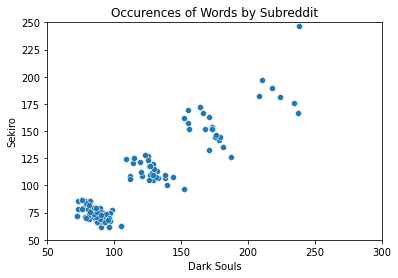

In [11]:
sns.scatterplot(x='dark_souls', y='sekiro', data=df_counts)
plt.xlim(right=400, left=0);
plt.title('Occurences of Words by Subreddit');
plt.xlabel('Dark Souls')
plt.xlim((50,300))
plt.ylim((50,250))
plt.ylabel('Sekiro');
plt.savefig('../output/occurences.png')

In [12]:
temp =  sd2_counts.sort_values('count', ascending=False).head(10).index
temp2 = ds_counts.sort_values('count', ascending=False).head(10).index
sameness = [word for word in temp2 if word in temp]
sameness
    



['sword', 'does', 'try', 'good', 'better', 'parry', 'butterfly']

Of the top 10 words for each game 8 are shared. One of them 'butterfly' refers to a different boss in each game. Some of the others deal with general game mechanics. What is interesting is that 'ds1' appears in the top 10 words for Sekiro, 'ds1' is short for Dark Souls 1. Not too surprising since they are made by the same company, but it does mean that the name of the game is not a very strong positive indicator of finding the matching reddit. 

<h2>Using Logistic Regression accross both title and text to find important words</h2>
    The models in this section are pulled from the logreg and logreg-text notebooks. Negative coeficients support a post refering to Sekiro while positive coeficients 'vote' for darksouls. As a note these models only looked at words that appeared between 100 and 400 times across both subreddits.

In [13]:
with open('../pickels/logregmodel_coefs.pkl', 'rb') as data_in:
    coefs = pickle.load(data_in)


In [14]:
coefs.sort_values('Coef', ascending = False).head(10)

,Coef
smough,5.525604
quick,4.409929
depths,3.322535
ds,3.289306
weapons,3.279091
blighttown,3.219927
ds1,3.074953
build,3.051071
killed,2.923094
armor,2.852155


In [15]:
coefs.sort_values('Coef', ascending = False).tail(10)

,Coef
warmup,-4.477116
headless,-4.672979
love,-4.678711
5600xt,-4.695682
advise,-4.695682
vs,-4.743654
grinding,-4.770720
advice,-4.868249
demake,-5.264791
worth,-5.720662


When examining a simple logistic regression model trained on the title text of the two reddits we do see here that ds and ds1 are strong indicators for the reddit matching that game. 

In [16]:
with open('../pickels/logregmodel_text_coefs.pkl', 'rb') as data_in:
    coefs_text = pickle.load(data_in)

In [17]:
coefs_text.sort_values('Coef', ascending = False).head(10)

,Coef
build,2.971656
curious,2.952491
blighttown,2.755551
ps4,2.538947
taurus,2.440415
wanna,2.410356
password,2.365639
enjoy,2.332584
weapons,2.290489
gwyn,2.285476


In [18]:
coefs_text.sort_values('Coef', ascending = False).tail(10)

,Coef
saw,-2.277477
feels,-2.488178
gauntlets,-2.562937
favorite,-2.592847
deathblow,-2.775359
outfit,-2.785697
mod,-4.515762
hints,-4.518581
recommend,-5.034247
deleted,-5.066097


Now when we look at an identical model trained on 'selftext' our most significant words change drastically. As Predicted in earlier EDA the name of the game is not a strong indicator in the actual text of a post. 

<h2>Random Forest comparison with logistic regression model trained on selftext</h2>

In [19]:
with open('../pickels/randomforest.pkl', mode ='rb') as pickle_in:
    rs = pickle.load(pickle_in).best_estimator_
with open('../pickels/logregmodel_text.pkl', mode ='rb') as pickle_in:
    logreg = pickle.load(pickle_in)
with open('../pickels/X_test_text.pkl', mode ='rb') as pickle_in:
    X_test = pickle.load(pickle_in)
    
with open('../pickels/X_train_text.pkl', mode ='rb') as pickle_in:
    X_train = pickle.load(pickle_in)
    
with open('../pickels/y_test_text.pkl', mode ='rb') as pickle_in:
    y_test = pickle.load(pickle_in)
    
with open('../pickels/y_train_text.pkl', mode ='rb') as pickle_in:
    y_train = pickle.load(pickle_in)
    

In [20]:
importances = pd.DataFrame(rs.feature_importances_, index = X_train.columns, columns = ['random_forest_importance'])

In [21]:
importances['logreg_text_coef'] = [coefs_text.loc[i, 'Coef'] for i in importances.index]

importances['logreg_text_importance'] = abs(importances['logreg_text_coef'])
importances.sort_values('random_forest_importance', ascending = False).head(20)


,random_forest_importance,logreg_text_coef,logreg_text_importance
deleted,0.026606,-5.066097,5.066097
gauntlets,0.016747,-2.562937,2.562937
bar,0.016296,-1.419464,1.419464
blighttown,0.012711,2.755551,2.755551
gwyn,0.012700,2.285476,2.285476
grind,0.012141,-2.074051,2.074051
humanity,0.011499,1.306646,1.306646
warrior,0.011330,-1.890887,1.890887
mean,0.011040,1.408761,1.408761
skills,0.010916,-1.308653,1.308653


In [22]:
importances.sort_values('logreg_text_importance', ascending = False).head(20)


,random_forest_importance,logreg_text_coef,logreg_text_importance
deleted,0.026606,-5.066097,5.066097
recommend,0.005697,-5.034247,5.034247
hints,0.007959,-4.518581,4.518581
mod,0.009033,-4.515762,4.515762
build,0.008736,2.971656,2.971656
curious,0.002786,2.952491,2.952491
outfit,0.007600,-2.785697,2.785697
deathblow,0.007253,-2.775359,2.775359
blighttown,0.012711,2.755551,2.755551
favorite,0.006913,-2.592847,2.592847


In [23]:

importances.sort_values('logreg_text_importance', ascending = False).mean()

random_forest_importance    0.001227
logreg_text_coef           -0.128170
logreg_text_importance      0.564582
dtype: float64

In [24]:
temp = importances.sort_values('logreg_text_importance', ascending = False).head(250).index
temp2 = importances.sort_values('random_forest_importance', ascending = False).head(250).index
sameness = [word for word in temp2 if word in temp]
print(len(sameness))

182


In [25]:
sameness_df = pd.DataFrame([importances.loc[i] for i in sameness])


In [26]:
sameness_df.head(20).to_html().replace('\n', '')

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>random_forest_importance</th>      <th>logreg_text_coef</th>      <th>logreg_text_importance</th>    </tr>  </thead>  <tbody>    <tr>      <th>deleted</th>      <td>0.026606</td>      <td>-5.066097</td>      <td>5.066097</td>    </tr>    <tr>      <th>gauntlets</th>      <td>0.016747</td>      <td>-2.562937</td>      <td>2.562937</td>    </tr>    <tr>      <th>bar</th>      <td>0.016296</td>      <td>-1.419464</td>      <td>1.419464</td>    </tr>    <tr>      <th>blighttown</th>      <td>0.012711</td>      <td>2.755551</td>      <td>2.755551</td>    </tr>    <tr>      <th>gwyn</th>      <td>0.012700</td>      <td>2.285476</td>      <td>2.285476</td>    </tr>    <tr>      <th>grind</th>      <td>0.012141</td>      <td>-2.074051</td>      <td>2.074051</td>    </tr>    <tr>      <th>humanity</th>      <td>0.011499</td>      <td>1.306646</td>      <td>1.306646</td>    </tr>    <tr>    

<AxesSubplot:xlabel='random_forest_importance', ylabel='logreg_text_importance'>

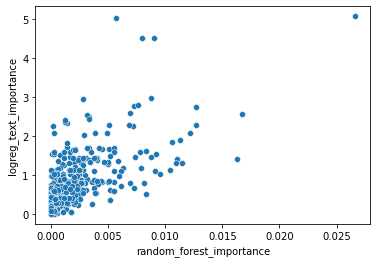

In [27]:
sns.scatterplot(x= 'random_forest_importance', y='logreg_text_importance', data = importances)  

In [28]:
coefs_text.shape

(815, 1)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
Xlr = importances[['random_forest_importance']]
ylr = importances['logreg_text_importance']
Xlr_train, Xlr_test, ylr_train, ylr_test =  train_test_split(Xlr, ylr)

In [30]:
lr.fit(Xlr_train, ylr_train)


LinearRegression()

In [31]:
lr.score(Xlr_test, ylr_test), mean_squared_error(ylr_test, lr.predict(Xlr_test))

(0.4625162294228372, 0.15751589581825626)

In [32]:
importances['logreg_text_importance'].std()

0.5856912393413616

The importance rating for logistic regression is the absolute value of the coeficient. I Then built a linear regression model to try to predict the logistic importance based of the random forest importance. It turns out that the importance of words between these two models are highly correlated. The linear regression model was able to use random forest importance to predict logistic regression importance within 1/3 of a standard deviation. 

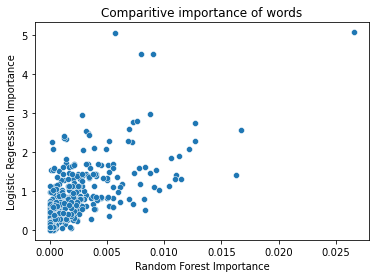

In [71]:
sns.scatterplot(x= 'random_forest_importance', y='logreg_text_importance', data = importances);
plt.title('Comparitive importance of words');
plt.xlabel('Random Forest Importance')
plt.ylabel('Logistic Regression Importance')
plt.savefig('../output/comparitive.png')

If you look at the above chart you will see that there is indeed a relationship that borders linearity between the importance indexes of these two models. Furthermore 74.8% of the top words for each model are shared (187/250). 

In [34]:
from sklearn.metrics import plot_confusion_matrix

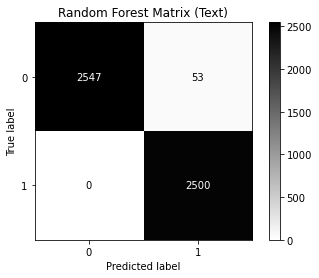

In [62]:
plot_confusion_matrix(rs, X_test, y_test, cmap = 'gray_r');
plt.title('Random Forest Matrix (Text)');

plt.savefig('../output/random-forest-matrix.png')

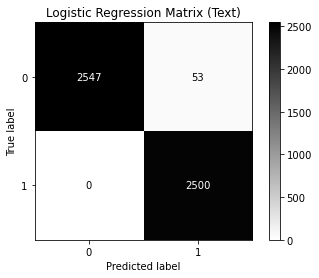

In [66]:
plot_confusion_matrix(logreg, X_test, y_test, cmap = 'gray_r');

plt.title('Logistic Regression Matrix (Text)');

plt.savefig('../output/logistic-matrix.png')

In [37]:
logreg.score(X_test, y_test), rs.score(X_test, y_test)

(0.9896078431372549, 0.9896078431372549)

In [68]:
rs.score(X_train, y_train), rs.score(X_test, y_test)

(0.9903921568627451, 0.9896078431372549)

In [39]:
assert logreg != rs

In [40]:
assert type(logreg) != type(rs) 

I had to be sure that these models were in fact different after I got the exact same score on both test and train data accross these two models. With an accuracy of roughly 99 percent for both train and test data and with highly correlated importances of individual words it would seem that both models were able to very effectively approximate f(x). 

In [41]:
temp = pd.DataFrame([importances.loc[word] for word in df_counts.index if word in importances.index])
temp['occurences_dark_souls'] = [df_counts.loc[word, 'dark_souls'] for word in temp.index]
temp['occurences_sekiro'] = [df_counts.loc[word, 'sekiro'] for word in temp.index]
temp['occurences_gap'] = [df_counts.loc[word, 'gap'] for word in temp.index]
temp.head()

,random_forest_importance,logreg_text_coef,logreg_text_importance,occurences_dark_souls,occurences_sekiro,occurences_gap
able,0.000392,-0.007362,0.007362,144.0,108.0,36.0
advice,0.000143,-0.070714,0.070714,166.0,167.0,1.0
armored,0.003310,-1.687621,1.687621,173.0,152.0,21.0
awesome,0.002496,-0.660106,0.660106,112.0,109.0,3.0
bed,0.001259,0.721090,0.721090,96.0,68.0,28.0


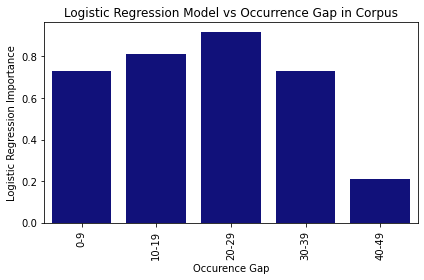

In [42]:
temp['occurences_gap'] = [ele if ele <50  else 51 for ele in temp['occurences_gap']]
temp['ogg'] = (temp['occurences_gap'] // 10).map({0:'0-9', 1:'10-19', 2:'20-29',3:'30-39', 4:'40-49',5:'>50'})
sns.barplot(y= 'logreg_text_importance', x='ogg', data=temp.sort_values('occurences_gap'),  ci=None, color='darkblue') ;

plt.title('Logistic Regression Model vs Occurrence Gap in Corpus');
plt.xlabel('Occurence Gap')
plt.ylabel('Logistic Regression Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('../output/LogReg-V-Gap.png')

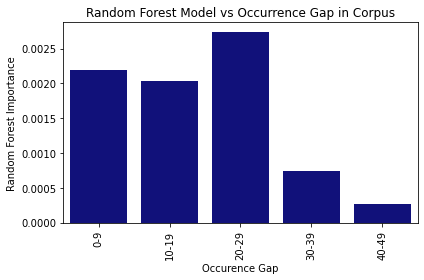

In [69]:
sns.barplot(y= 'random_forest_importance', x='ogg', data=temp.sort_values('occurences_gap'),  ci=None, color='darkblue') ;

plt.title('Random Forest Model vs Occurrence Gap in Corpus');
plt.xlabel('Occurence Gap')
plt.ylabel('Random Forest Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('../output/RF-V-Gap.png')

In [72]:
from sklearn import metrics

In [74]:
metrics.precision_score(y_test, rs.predict(X_test)),metrics.precision_score(y_test, logreg.predict(X_test))

(0.9792401096748923, 0.9792401096748923)

In [77]:
metrics.recall_score(y_test, rs.predict(X_test)),metrics.recall_score(y_test, logreg.predict(X_test))

(1.0, 1.0)

In [82]:
metrics.f1_score(y_test, rs.predict(X_test)),metrics.f1_score(y_test, logreg.predict(X_test))

(0.9895111814763508, 0.9895111814763508)

Models are identical in all scores reviewed.